In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_text_mod_PCA_2.csv to train_text_mod_PCA_2.csv


In [ ]:

uploaded = files.upload()

Saving train_text_mod.csv to train_text_mod.csv


In [ ]:
train_text_mod = pd.read_csv(io.BytesIO(uploaded['train_text_mod.csv']))

In [ ]:
import io
import pandas as pd 
train_text_mod_PCA_2 = pd.read_csv(io.BytesIO(uploaded['train_text_mod_PCA_2.csv']))

In [ ]:
train_text_mod_PCA_2.head()

,Unnamed: 0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,ID,source_data
0,0,11953.999957,-0.470192,0.159837,-0.713936,0.014255,0.398862,-0.734139,0.265361,0.286255,-0.208690,PROJ0x5377,automobile
1,1,11952.999961,-0.413747,-0.351478,-0.048922,0.151280,0.740004,-0.899190,0.219184,0.578847,0.412191,PROJ0x24dc,automobile
2,2,11952.000080,-0.838580,2.129861,-2.060892,0.695630,-1.031761,0.950084,-0.199754,-0.046724,0.230304,PROJ0x78e,automobile
3,3,11951.000002,-0.066843,-0.918473,0.738585,0.743294,0.126155,-0.344400,-0.227158,0.163031,0.465050,PROJ0x403b,automobile
4,4,11949.999993,-0.165876,-0.508789,0.225406,0.348422,0.882719,-0.441103,0.284449,0.389115,0.411219,PROJ0x8700,automobile


In [ ]:
import io
import pandas as pd 
train_text_mod = pd.read_csv(io.BytesIO(uploaded['train_text_mod.csv']))
train_text_mod_PCA = train_text_mod.copy(deep = True)

train_text_mod_PCA.drop(['Symbol','Start_date','market_cap','Sector','Country'], axis =1 , inplace = True)
train_text_mod_PCA.drop(['CEO','No.of employee','Revenue (Cr)','Net-valuation (Cr)','Share_price (RS)'], axis =1 , inplace = True)

In [ ]:
train_text_mod_PCA_var = train_text_mod_PCA[['ID','Type','Product']]
train_text_mod_PCA.drop(['ID','Type','Product'], axis = 1, inplace = True)

In [ ]:
train_text_mod_PCA.fillna(0, inplace = True)

In [ ]:
train_text_mod_PCA.head()

,Unnamed: 0,source_data,50,50 50,also,application,automobile,based,building,business,called,century,city,company,computer,concept,cost,country,data,design,developed,development,device,economy,electric,electricity,emission,energy,every,example,first,form,fuel,general,generation,good,government,green,group,health,...,speech,standard.1,state.1,station,still,store,study,substance,symptom,system.1,technology.1,temperature,term.1,thermometer,three,time.1,toy,treatment,truck,turbine,two,type,typically,unit,united.1,united state,use.1,used.1,user.1,using,usually,vehicle.1,video,water,wave,well,wind,world.1,would,year.1
0,0,automobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,automobile,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,automobile,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,automobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,automobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = train_text_mod_PCA.drop(['Unnamed: 0','source_data'], axis=1 )

In [ ]:
X.head()

,50,50 50,also,application,automobile,based,building,business,called,century,city,company,computer,concept,cost,country,data,design,developed,development,device,economy,electric,electricity,emission,energy,every,example,first,form,fuel,general,generation,good,government,green,group,health,healthcare,hold,...,speech,standard.1,state.1,station,still,store,study,substance,symptom,system.1,technology.1,temperature,term.1,thermometer,three,time.1,toy,treatment,truck,turbine,two,type,typically,unit,united.1,united state,use.1,used.1,user.1,using,usually,vehicle.1,video,water,wave,well,wind,world.1,would,year.1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


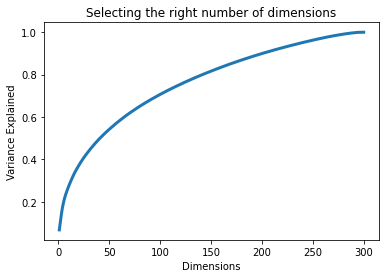

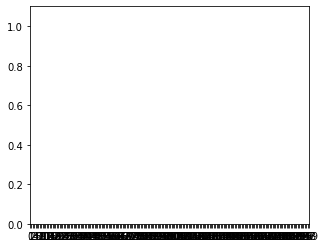

In [ ]:
pca = PCA()
pca.fit(X)

cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.arange(len(cumsum))+1

plt.plot(dim,cumsum,'-',lw=3);

plt.xlabel('Dimensions')
plt.ylabel('Variance Explained')
plt.title('Selecting the right number of dimensions')
plt.figure(figsize=(5, 4))
plt.xticks(np.arange(200))
plt.ylim([0,1.1]);

PCA not helping a lot to reduce dimensionsm. 

In [ ]:
dim

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
#Reduce the dimensionality of the data to 10 principal components
from sklearn.decomposition import PCA
pca =  PCA(n_components= 10).fit(train_text_mod_PCA)


In [ ]:
train_text_mod_PCA = pd.DataFrame(pca.transform(train_text_mod_PCA))

In [ ]:
pcs = ['pc'+str(i+1) for i in range(10)]

In [ ]:
#Adding weight, Resp and action to the new dataframe
train_text_mod_PCA.columns = pcs
train_text_mod_PCA.head()
train_text_mod_PCA
train_text_mod_PCA_1= pd.concat([train_text_mod_PCA, train_text_mod_PCA_var], axis=1)

In [ ]:
train_text_mod_PCA_2 = train_text_mod_PCA_1.drop(['Type','Product'], axis =1 )

In [ ]:
train_text_mod_PCA_2.columns

NameError: ignored

In [ ]:
train_text_mod_PCA_2.to_csv('train_text_mod_PCA_2.csv')
files.download('train_text_mod_PCA_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
train_text_mod_PCA_2 = pd.read_csv('/content/train_text_mod_PCA_2.csv')

In [ ]:
##############prediction
#create a mapping from labels to a unique integer and vice versa for labelling and prediction later
labels = train_text_mod_PCA_2['source_data'].unique()
i = 0
idx2class = {} 
class2idx = {}
for tp in labels:
    idx2class[i] = tp
    class2idx[tp] = i
    i += 1
idx2class

{0: 'automobile', 1: 'computer', 2: 'health', 3: 'manufacturing', 4: 'power'}

In [ ]:
train_text_mod_PCA_2['label'] = train_text_mod_PCA_2['source_data'].replace(class2idx)

In [ ]:
import numpy as np
def stratified_split(df, target, val_percent=0.2):
    '''
    Function to split a dataframe into train and validation sets, while preserving the ratio of the labels in the target variable
    Inputs:
    - df, the dataframe
    - target, the target variable
    - val_percent, the percentage of validation samples, default 0.2
    Outputs:
    - train_idxs, the indices of the training dataset
    - val_idxs, the indices of the validation dataset
    '''
    classes=list(df[target].unique())
    train_idxs, val_idxs = [], []
    for c in classes:
        idx=list(df[df[target]==c].index)
        np.random.shuffle(idx)
        val_size=int(len(idx)*val_percent)
        val_idxs+=idx[:val_size]
        train_idxs+=idx[val_size:]
    return train_idxs, val_idxs

train_idxs, val_idxs = stratified_split(train_text_mod_PCA_2, 'label', val_percent=0.2)

val_idxs, test_idxs = stratified_split(train_text_mod_PCA_2[train_text_mod_PCA_2.index.isin(val_idxs)], 'label', val_percent=0.5)

In [ ]:
def test_stratified(df, col):
    '''
    Analyzes the ratio of different classes in a categorical variable within a dataframe
    Inputs:
    - dataframe
    - categorical column to be analyzed
    Returns: None
    '''
    classes=list(df[col].unique())
    
    for c in classes:
        print(f'Proportion of records with {c}: {len(df[df[col]==c])*1./len(df):0.2} ({len(df[df[col]==c])} / {len(df)})')

In [ ]:
print('---------- STRATIFIED SAMPLING REPORT ----------')
print('-------- Label proportions in FULL data --------')
test_stratified(train_text_mod_PCA_2, 'label')
print('-------- Label proportions in TRAIN data --------')
test_stratified(train_text_mod_PCA_2[train_text_mod_PCA_2.index.isin(train_idxs)], 'label')
print('------ Label proportions in VALIDATION data -----')
test_stratified(train_text_mod_PCA_2[train_text_mod_PCA_2.index.isin(val_idxs)], 'label')
print('-------- Label proportions in TEST data ---------')
test_stratified(train_text_mod_PCA_2[train_text_mod_PCA_2.index.isin(test_idxs)], 'label')

---------- STRATIFIED SAMPLING REPORT ----------
-------- Label proportions in FULL data --------
Proportion of records with 0: 0.2 (4807 / 23909)
Proportion of records with 1: 0.2 (4828 / 23909)
Proportion of records with 2: 0.2 (4698 / 23909)
Proportion of records with 3: 0.2 (4837 / 23909)
Proportion of records with 4: 0.2 (4739 / 23909)
-------- Label proportions in TRAIN data --------
Proportion of records with 0: 0.2 (3846 / 19130)
Proportion of records with 1: 0.2 (3863 / 19130)
Proportion of records with 2: 0.2 (3759 / 19130)
Proportion of records with 3: 0.2 (3870 / 19130)
Proportion of records with 4: 0.2 (3792 / 19130)
------ Label proportions in VALIDATION data -----
Proportion of records with 0: 0.2 (481 / 2392)
Proportion of records with 1: 0.2 (483 / 2392)
Proportion of records with 2: 0.2 (470 / 2392)
Proportion of records with 3: 0.2 (484 / 2392)
Proportion of records with 4: 0.2 (474 / 2392)
-------- Label proportions in TEST data ---------
Proportion of records with 

In [ ]:
train_text_mod_PCA_2.head()

,Unnamed: 0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,ID,source_data,label
0,0,11953.999957,-0.470192,0.159837,-0.713936,0.014255,0.398862,-0.734139,0.265361,0.286255,-0.208690,PROJ0x5377,automobile,0
1,1,11952.999961,-0.413747,-0.351478,-0.048922,0.151280,0.740004,-0.899190,0.219184,0.578847,0.412191,PROJ0x24dc,automobile,0
2,2,11952.000080,-0.838580,2.129861,-2.060892,0.695630,-1.031761,0.950084,-0.199754,-0.046724,0.230304,PROJ0x78e,automobile,0
3,3,11951.000002,-0.066843,-0.918473,0.738585,0.743294,0.126155,-0.344400,-0.227158,0.163031,0.465050,PROJ0x403b,automobile,0
4,4,11949.999993,-0.165876,-0.508789,0.225406,0.348422,0.882719,-0.441103,0.284449,0.389115,0.411219,PROJ0x8700,automobile,0


In [ ]:
train_text_mod_PCA_2.drop(['Unnamed: 0'], axis =1 , inplace =True)

In [ ]:
train_text_mod_PCA_2.drop(['source_data'], axis =1 , inplace =True)

In [ ]:
train_text_mod_PCA_2.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,ID,label
0,11953.999957,-0.470192,0.159837,-0.713936,0.014255,0.398862,-0.734139,0.265361,0.286255,-0.208690,PROJ0x5377,0
1,11952.999961,-0.413747,-0.351478,-0.048922,0.151280,0.740004,-0.899190,0.219184,0.578847,0.412191,PROJ0x24dc,0
2,11952.000080,-0.838580,2.129861,-2.060892,0.695630,-1.031761,0.950084,-0.199754,-0.046724,0.230304,PROJ0x78e,0
3,11951.000002,-0.066843,-0.918473,0.738585,0.743294,0.126155,-0.344400,-0.227158,0.163031,0.465050,PROJ0x403b,0
4,11949.999993,-0.165876,-0.508789,0.225406,0.348422,0.882719,-0.441103,0.284449,0.389115,0.411219,PROJ0x8700,0


In [ ]:

train_df = train_text_mod_PCA_2[train_text_mod_PCA_2.index.isin(train_idxs)]
X_train = train_df.drop(['ID','label'], axis = 1 ).values
Y_train = train_df[['label']].values
val_df = train_text_mod_PCA_2[train_text_mod_PCA_2.index.isin(val_idxs)]
X_val = val_df.drop(['ID','label'], axis = 1 ).values
Y_val = val_df[['label']].values
print('Retrieved Validation Data')
test_df = train_text_mod_PCA_2[train_text_mod_PCA_2.index.isin(test_idxs)]
X_test = test_df.drop(['ID','label'], axis = 1 ).values
Y_test = test_df[['label']].values
print('Retrieved Test Data')

Retrieved Validation Data
Retrieved Test Data


In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
#store data, all in numpy arrays
training_data = {'X_train':X_train,'Y_train':Y_train,
                'X_val': X_val,'Y_val':Y_val,
                'X_test': X_test,'Y_test':Y_test}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=None,random_state=27,
                       verbose=1)
clf.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.5s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=27, verbose=1,
                       warm_start=False)

In [ ]:

predicted_labels = clf.predict(training_data['X_test'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
accuracy_score(training_data['Y_test'], predicted_labels)

0.9995810640971932

In [ ]:
#####Running RF model again - without PCA 

